<a href="https://colab.research.google.com/github/Spyke2022/BookRepo/blob/master/C%C3%B3pia_de_Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
path = 'https://github.com/EraylsonGaldino/MaterialTS/blob/master/vendas_varejo.xlsx?raw=true'
serie_varejo = pd.read_excel(path)

In [ ]:
serie_varejo

,Data,Indice
0,2000-01-01,53.2
1,2000-02-01,53.8
2,2000-03-01,56.1
3,2000-04-01,56.1
4,2000-05-01,58.4
...,...,...
184,2015-05-01,110.6
185,2015-06-01,104.1
186,2015-07-01,106.8
187,2015-08-01,106.6


In [ ]:
serie_varejo.set_index('Data', inplace=True)

In [ ]:
serie_varejo

,Indice
Data,
2000-01-01,53.2
2000-02-01,53.8
2000-03-01,56.1
2000-04-01,56.1
2000-05-01,58.4
...,...
2015-05-01,110.6
2015-06-01,104.1
2015-07-01,106.8


<Axes: xlabel='Data'>

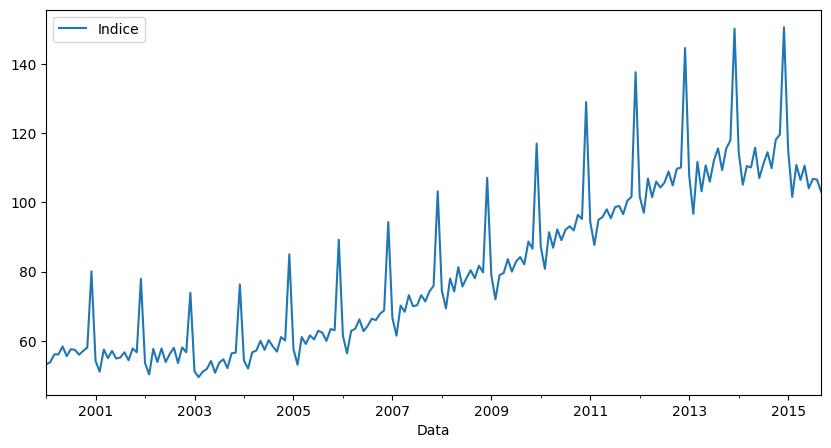

In [ ]:
serie_varejo.plot(figsize=(10, 5))

In [ ]:
btc_symbol = 'BTC-USD'
btc_data = yf.download(btc_symbol, start='2015-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
btc_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055


In [ ]:
serie_btc_close = btc_data['Adj Close']

<Axes: xlabel='Date'>

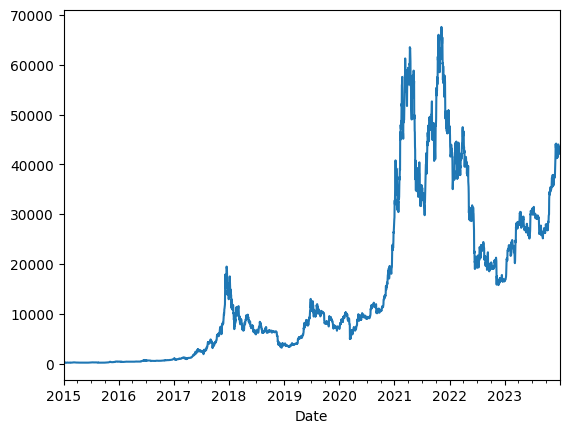

In [ ]:
serie_btc_close.plot()

In [ ]:
btc_close_month = serie_btc_close.resample('M').mean()

<Axes: xlabel='Date'>

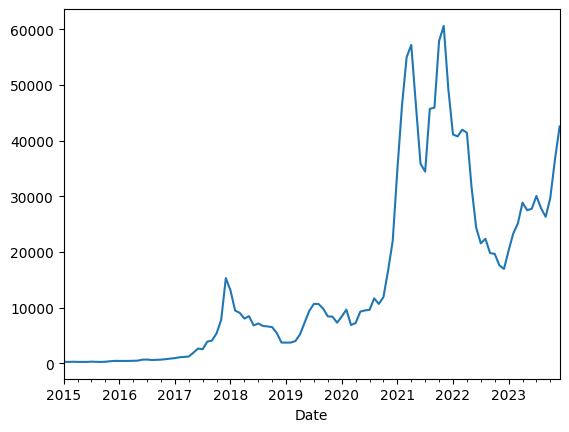

In [ ]:
btc_close_month.plot()

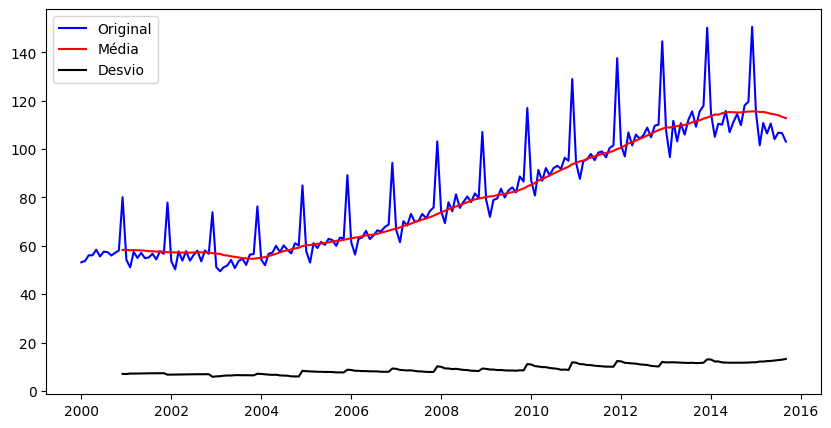

In [ ]:
#estacionaria

m_m = serie_varejo.rolling(window=12).mean()
m_std = serie_varejo.rolling(window=12).std()

plt.figure(figsize=(10, 5))
orig = plt.plot(serie_varejo, color='blue',label='Original')
mean = plt.plot(m_m, color='red',label='Média')
std = plt.plot(m_std, color='black',label='Desvio')
plt.legend(loc='best')
plt.show()

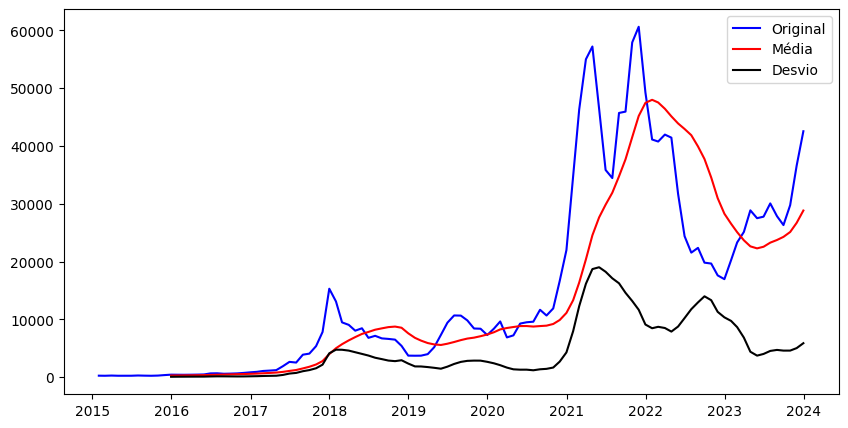

In [ ]:
m_m = btc_close_month.rolling(window=12).mean()
m_std = btc_close_month.rolling(window=12).std()

plt.figure(figsize=(10, 5))
orig = plt.plot(btc_close_month, color='blue',label='Original')
mean = plt.plot(m_m, color='red',label='Média')
std = plt.plot(m_std, color='black',label='Desvio')
plt.legend(loc='best')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
dftest = adfuller(serie_varejo)
print(f'p-value {dftest[1]}')
nivel_significancia = 0.05
if dftest[1] > nivel_significancia:
  print('A série não é estacionária')
else:
  print('A série é estacionária')

p-value 0.3033810808007733
A série não é estacionária


In [ ]:
dftest = adfuller(btc_close_month)
print(f'p-value {dftest[1]}')
if dftest[1] > nivel_significancia:
  print('A série não é estacionária')
else:
  print('A série é estacionária')

p-value 0.6484205918837448
A série não é estacionária


In [ ]:
serie_varejo_diff = serie_varejo.diff().dropna()

<Axes: xlabel='Data'>

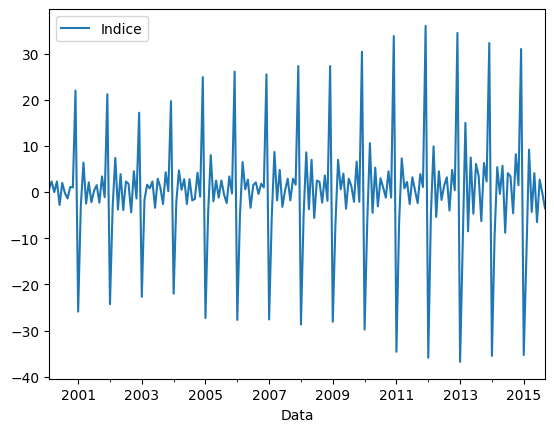

In [ ]:
serie_varejo_diff.plot()

In [ ]:
dftest = adfuller(serie_varejo_diff)
print(f'p-value {dftest[1]}')
if dftest[1] > nivel_significancia:
  print('A série não é estacionária')
else:
  print('A série é estacionária')

p-value 0.7957924414770232
A série não é estacionária


<Axes: xlabel='Data'>

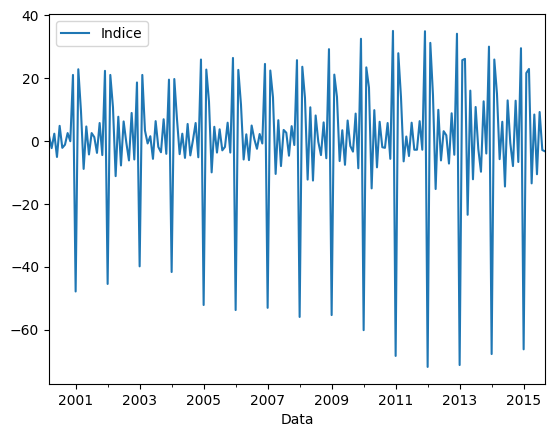

In [ ]:
serie_varejo_2_diff = serie_varejo_diff.diff().dropna()
serie_varejo_2_diff.plot()

In [ ]:
serie_diff_sazonal = serie_varejo.diff(12)

<Axes: xlabel='Data'>

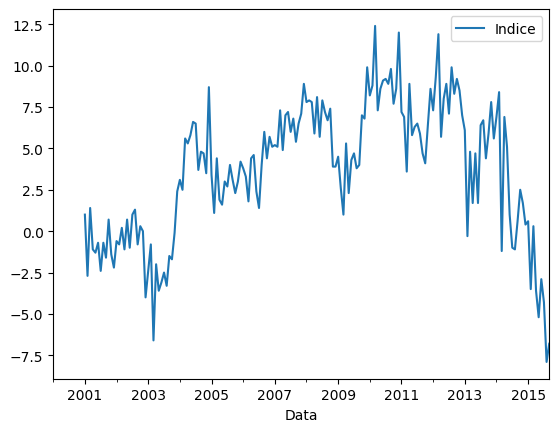

In [ ]:
serie_diff_sazonal.plot()

In [ ]:
dftest = adfuller(serie_varejo_2_diff)
print(f'p-value {dftest[1]}')
if dftest[1] > nivel_significancia:
  print('A série não é estacionária')
else:
  print('A série é estacionária')

p-value 2.3972760344014613e-27
A série é estacionária
